In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import numpy as np
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import load_model
import joblib
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [4]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [5]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
target = df['koi_disposition']
target_names = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']
data = df.drop('koi_disposition', axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1959,0,0,1,0,22.023514,1.398000e-04,-1.398000e-04,135.183490,0.005450,-0.005450,...,-192,4.489,0.062,-0.200,0.936,0.289,-0.096,299.59561,40.622822,14.818
5871,0,1,0,0,4.028671,4.390000e-07,-4.390000e-07,133.954215,0.000091,-0.000091,...,-208,4.168,0.190,-0.190,1.528,0.472,-0.387,292.22934,44.160789,13.775
4864,1,0,0,0,113.993156,2.636000e-03,-2.636000e-03,171.183400,0.020800,-0.020800,...,-309,3.921,0.197,-0.228,2.496,0.919,-0.647,299.74387,45.586361,11.176
3920,0,0,0,0,34.211502,3.004000e-04,-3.004000e-04,154.575080,0.007850,-0.007850,...,-100,4.610,0.018,-0.046,0.721,0.047,-0.029,286.66296,47.413700,14.017
3536,0,1,0,0,18.798622,1.540000e-05,-1.540000e-05,138.028268,0.000598,-0.000598,...,-185,4.585,0.030,-0.128,0.796,0.154,-0.066,290.20575,37.769138,17.628


In [8]:
# Scale your data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
clf = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf2.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8421052631578947


In [10]:
param_grid = {
    'max_depth': [10,40,80, 90, 100],
    'min_samples_split': [2,4,8, 10, 12],
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
grid = GridSearchCV(clf, param_grid, verbose=3)

In [11]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.874, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.882, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.886, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.878, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=best, score=0.885, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.855, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.861, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.878, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, splitter=random, score=0.860, total=   0.0s
[CV] criterion=gini, max_depth=10, 

[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.866, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.845, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=best, score=0.855, total=   0.2s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=random, score=0.839, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=random, score=0.845, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_split=2, splitter=random, score=0.841, total=   0.0s
[CV] criterion=gini, max_depth=40, min_

[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.854, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.855, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.858, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.847, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=best, score=0.857, total=   0.2s
[CV] criterion=gini, max_depth=80, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=80, min_samples_split=2, splitter=random, score=0.856, total=   0.1s
[CV] criterion=gini, max_depth=80, min_samples_

[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.847, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.862, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=best, score=0.847, total=   0.3s
[CV] criterion=gini, max_depth=90, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_split=2, splitter=random, score=0.844, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_

[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.847, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.859, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.844, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=gini, max_depth=100, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=100, min_samples_split=2, splitter=random, score=0.847, total=   0.0s
[CV] criterion=gini, max_depth=100, 

[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.867, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.892, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.884, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.872, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=best, score=0.890, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_split=2, splitter=random, score=0.846, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.852, total=   0.3s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.871, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.849, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=entropy, max_depth=40, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_split=2, splitter=random, score=0.839, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.848, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.870, total=   0.2s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.854, total=   0.4s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.855, total=   0.3s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=best, score=0.845, total=   0.3s
[CV] criterion=entropy, max_depth=80, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=80, min_samples_split=2, splitter=random, score=0.836, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.857, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.874, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.853, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.847, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=best, score=0.846, total=   0.2s
[CV] criterion=entropy, max_depth=90, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_split=2, splitter=random, score=0.844, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=90, min_samples_split=12, splitter=random, score=0.854, total=   0.1s
[CV] criterion=entropy, max_depth=90, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_split=12, splitter=random, score=0.871, total=   0.1s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.872, total=   0.4s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.856, total=   0.9s
[CV] criterion=entropy, max_depth=100, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=100, min_samples_split=2, splitter=best, score=0.843, total=   0.4s
[

[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=best, score=0.852, total=   0.3s
[CV] criterion=entropy, max_depth=100, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=random, score=0.854, total=   0.0s
[CV] criterion=entropy, max_depth=100, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=random, score=0.871, total=   0.0s
[CV] criterion=entropy, max_depth=100, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=random, score=0.852, total=   0.0s
[CV] criterion=entropy, max_depth=100, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=random, score=0.854, total=   0.0s
[CV] criterion=entropy, max_depth=100, min_samples_split=12, splitter=random 
[CV]  criterion=entropy, max_depth=100, min_samples_split=12, splitter=random, sco

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   57.5s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 40, 80, 90, 100],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'splitter': ['best', 'random']},
             verbose=3)

In [12]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}
0.8842259803957241


In [45]:
clf3 = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, splitter='best')
clf3 = clf3.fit(X_train_scaled, y_train)
predictions_clf = clf3.predict(X_test_scaled)
print(classification_report(y_test, predictions_clf,
                            target_names=target_names))
clf_report = classification_report(y_test, predictions_clf, target_names=target_names)

                precision    recall  f1-score   support

     CONFIRMED       0.82      0.67      0.73       412
FALSE POSITIVE       0.74      0.85      0.79       469
     CANDIDATE       0.98      0.99      0.99       867

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.87      1748



In [56]:
clf_t_s = clf3.score(X_train_scaled, y_train)
clf_tr_s = clf3.score(X_test_scaled, y_test)
print(f"Training Data Score: {clf_t_s}")
print(f"Testing Data Score: {clf_tr_s}")

Training Data Score: 0.9231356093839405
Testing Data Score: 0.8758581235697941


In [129]:
target_names

['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [130]:
clf_matrix = confusion_matrix(y_test, predictions_clf, labels=target_names)
clf_matrix

array([[399,  11,  59],
       [  6, 858,   3],
       [132,   6, 274]], dtype=int64)

In [160]:
def confusion(predict_algo):
    matrix_arr = confusion_matrix(y_test, predict_algo, labels=target_names)
    values = []
    recall_rows =[0,0,0]
    precision_col = [0,0,0]
    for i in range(3):
        values.append(clf_matrix[i,i])
        recall_rows[0] = recall_rows[0] + clf_matrix[0,i]
        recall_rows[1] = recall_rows[1] + clf_matrix[1,i]
        recall_rows[2] = recall_rows[2] + clf_matrix[2,i]
        precision_col[0] = precision_col[0] + clf_matrix[i,0]
        precision_col[1] = precision_col[1] + clf_matrix[i,1]
        precision_col[2] = precision_col[2] + clf_matrix[i,2]
    return matrix_arr,values,recall_rows,precision_col
    


In [183]:
def precision_recall(predict_algo):
    matrix_arr = confusion_matrix(y_test, predict_algo, labels=target_names)
    values = []
    recall_rows =[0,0,0]
    precision_col = [0,0,0]
    values_arr = []
    for i in range(3):
        values.append(clf_matrix[i,i])
        recall_rows[0] = recall_rows[0] + clf_matrix[0,i]
        recall_rows[1] = recall_rows[1] + clf_matrix[1,i]
        recall_rows[2] = recall_rows[2] + clf_matrix[2,i]
        precision_col[0] = precision_col[0] + clf_matrix[i,0]
        precision_col[1] = precision_col[1] + clf_matrix[i,1]
        precision_col[2] = precision_col[2] + clf_matrix[i,2]
        
        
    recall_score=[]
    precision_score = []
    for i in range(3):
        try:
            recall_score.append(arr_val[0][i]/arr_val[1][i])
            precision_score.append(arr_val[0][i]/arr_val[1][i])
        except:
            print(f'{i}')
    for i in range(3):
        values_arr.append({"output":target_names[i],"precision":precision_score[i],"recall":recall_score[i]})
    df_matrix = pd.DataFrame(values_arr)
    return df_matrix

In [184]:
precision_recall(predictions_clf)

,output,precision,recall
0,CONFIRMED,0.850746,0.850746
1,FALSE POSITIVE,0.989619,0.989619
2,CANDIDATE,0.665049,0.665049


In [170]:
arr_val = confusion(predictions_clf)[1:4]

In [174]:
recall_score=[]
precision_score = []
for i in range(3):
    try:
        recall_score.append(arr_val[0][i]/arr_val[1][i])
        precision_score.append(arr_val[0][i]/arr_val[1][i])
    except:
        print(f'{i}')

In [177]:
recall_score,precision_score,target_names

([0.8507462686567164, 0.9896193771626297, 0.6650485436893204],
 [0.8507462686567164, 0.9896193771626297, 0.6650485436893204],
 ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'])

In [154]:
values = []
recall_rows =[0,0,0]
precision_col = [0,0,0]
recall_a_row = 0
recall_b_row = 0
recall_c_row = 0
precision_a_col = 0
precision_b_col = 0
precision_c_col = 0

for i in range(3):
    values.append(clf_matrix[i,i])
    recall_rows[0] = recall_rows[0] + clf_matrix[0,i]
    recall_rows[1] = recall_rows[1] + clf_matrix[1,i]
    recall_rows[2] = recall_rows[2] + clf_matrix[2,i]
    recall_a_row = recall_a_row + clf_matrix[0,i]
    recall_b_row = recall_b_row + clf_matrix[1,i]
    recall_c_row = recall_c_row + clf_matrix[2,i]
    precision_col[0] = precision_col[0] + clf_matrix[i,0]
    precision_col[1] = precision_col[1] + clf_matrix[i,1]
    precision_col[2] = precision_col[2] + clf_matrix[i,2]
    precision_a_col = precision_a_col + clf_matrix[i,0]
    precision_b_col = precision_b_col + clf_matrix[i,1]
    precision_b_col = precision_b_col + clf_matrix[i,2]

In [155]:
recall_rows, precision_col

([469, 867, 412], [537, 875, 336])

In [153]:
recall_a_row

469

In [141]:
recall_a = values[0]/recall_a_row
recall_b = values[1]/recall_b_row
recall_c = values[2]/recall_c_row
precision_a = values[0]/precision_a_col
precision_b = values[1]/precision_b_col
precision_c = values[2]/precision_c_col


<ipython-input-141-ab23a9e7c9d7>:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  precision_c = values[2]/precision_c_col


In [143]:
target_names,values

(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], [399, 858, 274])

In [142]:
precision_c_col

0

In [15]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.897025171624714


In [16]:
rf2 = RandomForestClassifier()
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 50, 100, 500]
}
grid2 = GridSearchCV(rf2, param_grid2, verbose=3)

In [17]:
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.827, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.820, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.852, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.840, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.852, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.843, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.866, total=   3.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.871, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.863, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.872, total=   3.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.844, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.856, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.873, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.856, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.846, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.851, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.864, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.848, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.872, total=   4.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.814, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.825, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.843, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.861, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.858, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.868, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.847, total=   3.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.870, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.890, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.874, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.880, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  b

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.883, total=   4.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.847, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.857, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.862, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstra

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.873, total=   1.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.883, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.863, total=   4.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.883, total=   5.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.883, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.878, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.874, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.877, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.883, total=   4.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.844, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.846, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.856, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  b

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.863, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.874, total=   1.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.848, total=   5.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.865, total=   4.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.863, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.861, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.868, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.874, total=   1.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  b

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.859, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.853, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.830, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.844, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.861, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.847, total=   4.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.864, total=   4.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.872, total=   3.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.866, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.869, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.847, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.860, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.847, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.876, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.852, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50, score=0.856, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.883, total=   5.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.886, total=   5.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.876, total=   6.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.888, total=   5.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=10 
[

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.864, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.883, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.886, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.873, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.864, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.865, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.857, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50, score=0.883, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.888, total=   6.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.874, total=   5.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.882, total=   5.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.847, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.862, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.879, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.882, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.871, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.853, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.861, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.874, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50, score=0.870, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.863, total=   3.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.877, total=   3.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.827, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.840, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[C

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.858, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.861, total=   1.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.856, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.860, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.845, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.872, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.855, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50, score=0.841, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.865, total=   3.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.868, total=   3.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.843, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=10, score=0.853, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.881, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.884, total=   1.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.866, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.884, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.867, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.875, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.880, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50, score=0.872, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.876, total=   6.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.884, total=   5.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.839, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.854, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.885, total=   1.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.888, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.875, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.877, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.865, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.874, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.864, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.871, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.871, total=   5.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.885, total=   4.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.829, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.846, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[C

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.857, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.866, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.862, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.876, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.845, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.853, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.870, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50, score=0.864, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  bo

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.865, total=   4.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.872, total=   4.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.829, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=10, score=0.840, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.862, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.865, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.859, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.867, total=   1.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.844, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.854, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.867, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50, score=0.850, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.874, total=   5.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.887, total=   5.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.848, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.862, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.872, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.881, total=   1.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.876, total=   1.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.884, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.863, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.877, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.880, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.872, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.874, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.880, total=   5.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.849, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.840, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[C

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.873, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.874, total=   1.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.870, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.874, total=   1.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimato

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 38.6min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=3)

In [18]:
print(grid2.best_params_)
print(grid2.best_score_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.882129290709436


In [42]:
rf3 = RandomForestClassifier(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
rf3 = rf3.fit(X_train_scaled, y_train)
predictions_rf = rf3.predict(X_test_scaled)
print(classification_report(y_test, predictions_rf,
                            target_names=target_names))
rf_report = classification_report(y_test, predictions_rf,
                            target_names=target_names)

                precision    recall  f1-score   support

     CONFIRMED       0.82      0.68      0.74       412
FALSE POSITIVE       0.80      0.84      0.81       469
     CANDIDATE       0.94      1.00      0.97       867

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.87      0.88      0.87      1748



In [58]:
rf_t_s = rf3.score(X_train_scaled, y_train)
rf_tr_s = rf3.score(X_test_scaled, y_test)
print(f"Training Data Score: {rf_t_s}")
print(f"Testing Data Score: {rf_tr_s}")

Training Data Score: 0.9679572763684913
Testing Data Score: 0.8775743707093822


k: 1, Train/Test Score: 1.000/0.813
k: 3, Train/Test Score: 0.911/0.828
k: 5, Train/Test Score: 0.890/0.832
k: 7, Train/Test Score: 0.882/0.831
k: 9, Train/Test Score: 0.872/0.826
k: 11, Train/Test Score: 0.867/0.828
k: 13, Train/Test Score: 0.861/0.828
k: 15, Train/Test Score: 0.860/0.828
k: 17, Train/Test Score: 0.859/0.826
k: 19, Train/Test Score: 0.856/0.824


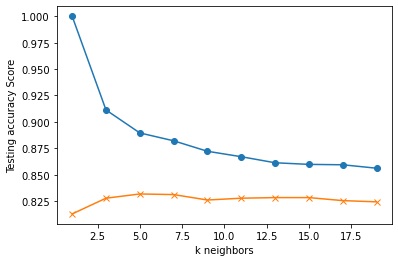

In [25]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")   
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn_f = KNeighborsClassifier(n_neighbors=5)
knn_f.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.824


In [27]:
knn = KNeighborsClassifier()
param_grid3 = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30],
    'n_jobs': [-1],
    'n_neighbors': [1,3,5,7,9,11,13,14,15,17,19,21,23,25,27,29],
}
grid3 = GridSearchCV(knn, param_grid3, verbose=3)
grid3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.786, total=  10.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.827, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.809, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.802, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=1, score=0.804, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.826, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.840, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=3 .....
[CV]  algo

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.850, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.836, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=19, score=0.825, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.831, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.826, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21, score=0.848, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=-1, n_neighbors=21 ....
[CV]

[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.845, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9 .....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.830, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9 .....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=9, score=0.829, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.818, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.836, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11, score=0.844, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=11 ....
[CV]  a

[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.845, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.825, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=27, score=0.831, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.825, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.816, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]  algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29, score=0.840, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=20, n_jobs=-1, n_neighbors=29 ....
[CV]

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.845, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.834, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=15, score=0.823, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.824, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.832, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17, score=0.841, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=-1, n_neighbors=17 ....
[CV]

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.840, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.832, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=5, score=0.830, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.828, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.840, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7, score=0.838, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=7 .......
[CV]  algorithm=kd_tre

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23, score=0.819, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=23, score=0.830, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.831, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.819, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.845, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25, score=0.822, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=-1, n_neighbors=25 ......
[CV]  algorithm=

[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=13, score=0.826, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.827, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.841, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.842, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.830, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14 ......
[CV]  algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=14, score=0.831, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=20, n_jobs=-1, n_neighbors=15 ......
[CV]  algorithm=

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=1, score=0.804, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.826, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.840, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.829, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.824, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3 .......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=3, score=0.819, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=5 .......
[CV]  algorithm=kd_tre

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.831, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.826, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.848, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.831, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=21, score=0.827, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23, score=0.830, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=-1, n_neighbors=23 ......
[CV]  algorithm=

[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.836, total=   0.6s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.844, total=   0.5s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.832, total=   0.5s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=11, score=0.833, total=   0.4s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13, score=0.827, total=   0.6s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13, score=0.834, total=   0.6s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=13 ........
[CV]  algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.840, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.825, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=10, n_jobs=-1, n_neighbors=29, score=0.829, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.786, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.827, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1, score=0.809, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=1 .........
[CV]  algorithm=brute, leaf_siz

[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17, score=0.828, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=17, score=0.826, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.825, total=   0.4s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.831, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.850, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19, score=0.836, total=   0.3s
[CV] algorithm=brute, leaf_size=20, n_jobs=-1, n_neighbors=19 ........
[CV]  algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=7, score=0.831, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.824, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.838, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.845, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.830, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9 .........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=9, score=0.829, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=11 ........
[CV]  algorithm=brute, leaf_size=3

[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.829, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.814, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.845, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.825, total=   0.4s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=27, score=0.831, total=   0.6s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29, score=0.825, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=-1, n_neighbors=29 ........
[CV]  algorithm=brute, leaf_

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  4.9min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'n_jobs': [-1],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 14, 15, 17, 19,
                                         21, 23, 25, 27, 29]},
             verbose=3)

In [28]:
print(grid3.best_params_)
print(grid3.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 5}
0.8344446546692961


In [41]:
knn_f = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=-1, n_neighbors=5)
knn_f.fit(X_train_scaled, y_train)

predictions_knn = knn_f.predict(X_test_scaled)
print(classification_report(y_test, predictions_knn,
                            target_names=target_names))
knn_report = classification_report(y_test, predictions_knn,
                            target_names=target_names)

                precision    recall  f1-score   support

     CONFIRMED       0.68      0.61      0.65       412
FALSE POSITIVE       0.71      0.76      0.73       469
     CANDIDATE       0.97      0.98      0.97       867

      accuracy                           0.83      1748
     macro avg       0.79      0.78      0.78      1748
  weighted avg       0.83      0.83      0.83      1748



In [59]:
knn_t_s = knn_f.score(X_train_scaled, y_train)
knn_tr_s = knn_f.score(X_test_scaled, y_test)
print(f"Training Data Score: {knn_t_s}")
print(f"Testing Data Score: {knn_tr_s}")

Training Data Score: 0.889567041769979
Testing Data Score: 0.8318077803203662


In [30]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.356


In [31]:
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid4 = GridSearchCV(model, param_grid, verbose=3)

In [32]:
grid4.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.883, total=   0.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.888, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.893, total=   1.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.891, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.901, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.883, total=   0.6s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.888, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.893, total=   1.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.891, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.4min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [33]:
print(grid4.best_params_)
print(grid4.best_score_)

{'C': 5, 'gamma': 0.0001}
0.8916670911591555


In [39]:
model = SVC(C=5, gamma=0.0001)
model.fit(X_train_scaled, y_train)
predictions_sv = model.predict(X_test_scaled)
print(classification_report(y_test, predictions_sv,
                            target_names=target_names))
sv_report = classification_report(y_test, predictions_sv,
                            target_names=target_names)

                precision    recall  f1-score   support

     CONFIRMED       0.69      0.54      0.60       412
FALSE POSITIVE       0.67      0.80      0.73       469
     CANDIDATE       0.98      0.97      0.97       867

      accuracy                           0.82      1748
     macro avg       0.78      0.77      0.77      1748
  weighted avg       0.83      0.82      0.82      1748



In [60]:
sv_t_s = model.score(X_train_scaled, y_train)
sv_tr_s = model.score(X_test_scaled, y_test)
print(f"Training Data Score: {sv_t_s}")
print(f"Testing Data Score: {sv_tr_s}")

Training Data Score: 0.8243372115201221
Testing Data Score: 0.8232265446224256


In [35]:
X_scaler2 = MinMaxScaler().fit(X_train)
X_train_scaled2 = X_scaler2.transform(X_train)
X_test_scaled2 = X_scaler2.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

model2 = Sequential()
model2.add(Dense(units=100, activation='relu', input_dim=40))
model2.add(Dense(units=100, activation='relu'))
model2.add(Dense(units=3, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model2.fit(
    X_train_scaled2,
    y_train_categorical,
    validation_split=.15,
    epochs=17,
    shuffle=True,
    verbose=2
)

Epoch 1/17
140/140 - 1s - loss: 0.5973 - categorical_accuracy: 0.7085 - val_loss: 0.3843 - val_categorical_accuracy: 0.8272
Epoch 2/17
140/140 - 0s - loss: 0.3840 - categorical_accuracy: 0.7935 - val_loss: 0.3308 - val_categorical_accuracy: 0.8475
Epoch 3/17
140/140 - 0s - loss: 0.3678 - categorical_accuracy: 0.8050 - val_loss: 0.3310 - val_categorical_accuracy: 0.8437
Epoch 4/17
140/140 - 0s - loss: 0.3557 - categorical_accuracy: 0.8149 - val_loss: 0.3400 - val_categorical_accuracy: 0.8018
Epoch 5/17
140/140 - 0s - loss: 0.3409 - categorical_accuracy: 0.8344 - val_loss: 0.3153 - val_categorical_accuracy: 0.8221
Epoch 6/17
140/140 - 0s - loss: 0.3345 - categorical_accuracy: 0.8360 - val_loss: 0.2973 - val_categorical_accuracy: 0.8717
Epoch 7/17
140/140 - 0s - loss: 0.3348 - categorical_accuracy: 0.8371 - val_loss: 0.2920 - val_categorical_accuracy: 0.8615
Epoch 8/17
140/140 - 0s - loss: 0.3244 - categorical_accuracy: 0.8461 - val_loss: 0.2931 - val_categorical_accuracy: 0.8513
Epoch 9/

In [36]:
model_loss, model_accuracy = model2.evaluate(
    X_test_scaled2, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3107 - categorical_accuracy: 0.8684
Normal Neural Network - Loss: 0.3106938898563385, Accuracy: 0.8684210777282715


In [52]:
encoded_predictions = model2.predict_classes(X_test_scaled2)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(classification_report(y_test, prediction_labels,
                            target_names=target_names))
deep_report = classification_report(y_test, prediction_labels,
                            target_names=target_names)

C:\Users\popes\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                precision    recall  f1-score   support

     CONFIRMED       0.78      0.66      0.71       412
FALSE POSITIVE       0.74      0.81      0.77       469
     CANDIDATE       0.98      1.00      0.99       867

      accuracy                           0.87      1748
     macro avg       0.83      0.82      0.83      1748
  weighted avg       0.87      0.87      0.87      1748



In [62]:
print(f"Training Data Score for Trees: {clf_t_s}")
print(f"Testing Data Score for Trees: {clf_tr_s}")
print(f"Training Data Score for Random Forests: {rf_t_s}")
print(f"Testing Data Score for Random Forests: {rf_tr_s}")
print(f"Training Data Score for KNN: {knn_t_s}")
print(f"Testing Data Score for KNN: {knn_tr_s}")
print(f"Training Data Score for SVC: {sv_t_s}")
print(f"Testing Data Score for SVC: {sv_tr_s}")

Training Data Score for Trees: 0.9231356093839405
Testing Data Score for Trees: 0.8758581235697941
Training Data Score for Random Forests: 0.9679572763684913
Testing Data Score for Random Forests: 0.8775743707093822
Training Data Score for KNN: 0.889567041769979
Testing Data Score for KNN: 0.8318077803203662
Training Data Score for SVC: 0.8243372115201221
Testing Data Score for SVC: 0.8232265446224256


In [100]:
dict_stuff = [{'model':'tree', 'train_score':clf_t_s, 'test_score':clf_tr_s},
{'model':'forest', 'train_score':rf_t_s, 'test_score':rf_tr_s},
{'model':'knn', 'train_score':knn_t_s, 'test_score':knn_tr_s},
{'model':'svc', 'train_score':sv_t_s, 'test_score':sv_tr_s}]
            

In [101]:
df = pd.DataFrame(dict_stuff)

In [102]:
df

,model,train_score,test_score
0,tree,0.923136,0.875858
1,forest,0.967957,0.877574
2,knn,0.889567,0.831808
3,svc,0.824337,0.823227


In [103]:
df['train_score'][0]

0.9231356093839405

In [104]:
train_max = df['train_score'].max()

In [106]:
model_t_m = ""
for i in range(len(df['train_score'])):
    if df['train_score'][i] == train_max:
        model_t_m = df['model'][i]
        test_tr = df['test_score'][i]
        print(model_t_m)
        print(train_max)
        print(test_tr)

forest
0.9679572763684913
0.8775743707093822


In [107]:
test_max = df['test_score'].max()

In [109]:
model_tr_m = ""
for i in range(len(df['train_score'])):
    if df['test_score'][i] == test_max:
        model_t_m = df['model'][i]
        train_t = df['train_score'][i]
        print(model_t_m)
        print(train_t)
        print(test_max)
        

forest
0.9679572763684913
0.8775743707093822


In [111]:
print("Trees Data")
print(clf_report)
print("---------------------------------------------------------------------------")
print("Forest Data")
print(rf_report)
print("---------------------------------------------------------------------------")
print("KNN Data")
print(knn_report)
print("---------------------------------------------------------------------------")
print("SVC Data")
print(sv_report)
print("---------------------------------------------------------------------------")
print("Deep Learning Data")
print(deep_report)

Trees Data
                precision    recall  f1-score   support

     CONFIRMED       0.82      0.67      0.73       412
FALSE POSITIVE       0.74      0.85      0.79       469
     CANDIDATE       0.98      0.99      0.99       867

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.87      1748

---------------------------------------------------------------------------
Forest Data
                precision    recall  f1-score   support

     CONFIRMED       0.82      0.68      0.74       412
FALSE POSITIVE       0.80      0.84      0.81       469
     CANDIDATE       0.94      1.00      0.97       867

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.87      0.88      0.87      1748

---------------------------------------------------------------------------
KNN Data
                precision 

In [120]:
filename = 'clf_trained.BCS'
joblib.dump(model, filename)

['clf_trained.BCS']

In [121]:
filename2 = 'rf_trained.BCS'
joblib.dump(model, filename2)

['rf_trained.BCS']

In [122]:
filename3 = 'knn_trained.BCS'
joblib.dump(knn_f, filename3)

['knn_trained.BCS']

In [123]:
filename4 = 'svc_trained.BCS'
joblib.dump(model, filename4)

['svc_trained.BCS']

In [124]:
model2.save("deep_exoplanet_model_trained.h5")

In [125]:
deep_model = load_model("deep_exoplanet_model_trained.h5")

In [126]:
deep_model